In [59]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from datetime import datetime, timedelta

from scipy import signal

In [7]:
# import requests
# from io import StringIO

# left = 'https://parsefiles.back4app.com/g5QYStzKuO7WhCJuoGBzmje07jUF2zyrQ4aaPiM3/f7ff369cf8dee440c910f1095b330ec9_Zrg1QEAvov_rawDataLeft_S358_20240304.txt'
# right = 'https://parsefiles.back4app.com/g5QYStzKuO7WhCJuoGBzmje07jUF2zyrQ4aaPiM3/93e974b7ae949816942d64673a5d0911_Zrg1QEAvov_rawDataRight_S358_20240304.txt'

# pd.read_csv(StringIO(requests.get(left).text), header=None).to_csv('left.csv', header=False, index=False)
# pd.read_csv(StringIO(requests.get(right).text), header=None).to_csv('right.csv', header=False, index=False)

In [211]:
left = pd.read_csv('left.csv')
left.columns = [
                'raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6', 'raw_7',
                'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12', 'raw_13','raw_14',
                'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'Timestamp' # timestamp accuracy to the second
            ]

right = pd.read_csv('right.csv')
right.columns = [
                'raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6', 'raw_7',
                'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12', 'raw_13','raw_14',
                'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'Timestamp' # timestamp accuracy to the second
            ]


print(len(left), len(right))
print(len(left['Timestamp'].unique()), len(right['Timestamp'].unique()))

7403 5445
372 387


In [212]:
# find the different timestamps in left and right
set(left['Timestamp'].unique()) - set(right['Timestamp'].unique())
set(right['Timestamp'].unique()) - set(left['Timestamp'].unique())

{223255,
 223308,
 223309,
 223310,
 223311,
 223312,
 223313,
 223314,
 223315,
 223316,
 223317,
 223318,
 223319,
 223320,
 223321}

In [213]:
def resample(df):
    ms = []
    timestamps = df['Timestamp'].unique()
    for second in timestamps:
        data = df[df['Timestamp'] == second]
        instances = len(data)
        ms_interval = 1000 // instances         # 1000 milliseconds in one second
        for i in range(instances):
            instance = datetime.strptime(str(second), '%H%M%S') + timedelta(milliseconds=ms_interval*i)
            ms.append(instance)
    df['ms'] = ms
    df = df.set_index('ms')
    df = df.resample('50L').ffill()
    df = df.reset_index()
    return df

releft = resample(left)
reright = resample(right)

C:\Users\yang\AppData\Local\Temp\ipykernel_12236\319460894.py:13: FutureWarning: 'L' is deprecated and will be removed in a future version, please use 'ms' instead.
  df = df.resample('50L').ffill()
C:\Users\yang\AppData\Local\Temp\ipykernel_12236\319460894.py:13: FutureWarning: 'L' is deprecated and will be removed in a future version, please use 'ms' instead.
  df = df.resample('50L').ffill()


In [214]:
reright

,ms,raw_1,raw_2,raw_3,raw_4,raw_5,raw_6,raw_7,raw_8,raw_9,...,raw_12,raw_13,raw_14,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Timestamp
0,1900-01-01 22:26:43.000,39,86,14,15,8,70,51,8,22,...,92,67,59,333,1255,-3229,-1482,433,-7,222643
1,1900-01-01 22:26:43.050,39,86,14,15,8,70,51,8,22,...,92,67,59,333,1255,-3229,-1482,433,-7,222643
2,1900-01-01 22:26:43.100,39,86,14,15,8,70,51,8,22,...,92,67,59,333,1255,-3229,-1482,433,-7,222643
3,1900-01-01 22:26:43.150,39,86,14,15,8,70,51,8,22,...,92,67,59,333,1255,-3229,-1482,433,-7,222643
4,1900-01-01 22:26:43.200,39,86,14,15,8,70,51,8,22,...,92,67,59,333,1255,-3229,-1482,433,-7,222643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,1900-01-01 22:33:21.700,123,107,133,85,34,93,97,58,5,...,106,121,116,179,-47,-4140,73,83,-47,223321
7975,1900-01-01 22:33:21.750,112,74,112,62,23,78,77,21,15,...,91,83,88,195,-101,-4048,162,-107,-17,223321
7976,1900-01-01 22:33:21.800,74,89,72,65,61,91,98,28,14,...,88,81,77,142,-226,-4056,-14,-16,-9,223321
7977,1900-01-01 22:33:21.850,74,89,72,65,61,91,98,28,14,...,88,81,77,142,-226,-4056,-14,-16,-9,223321


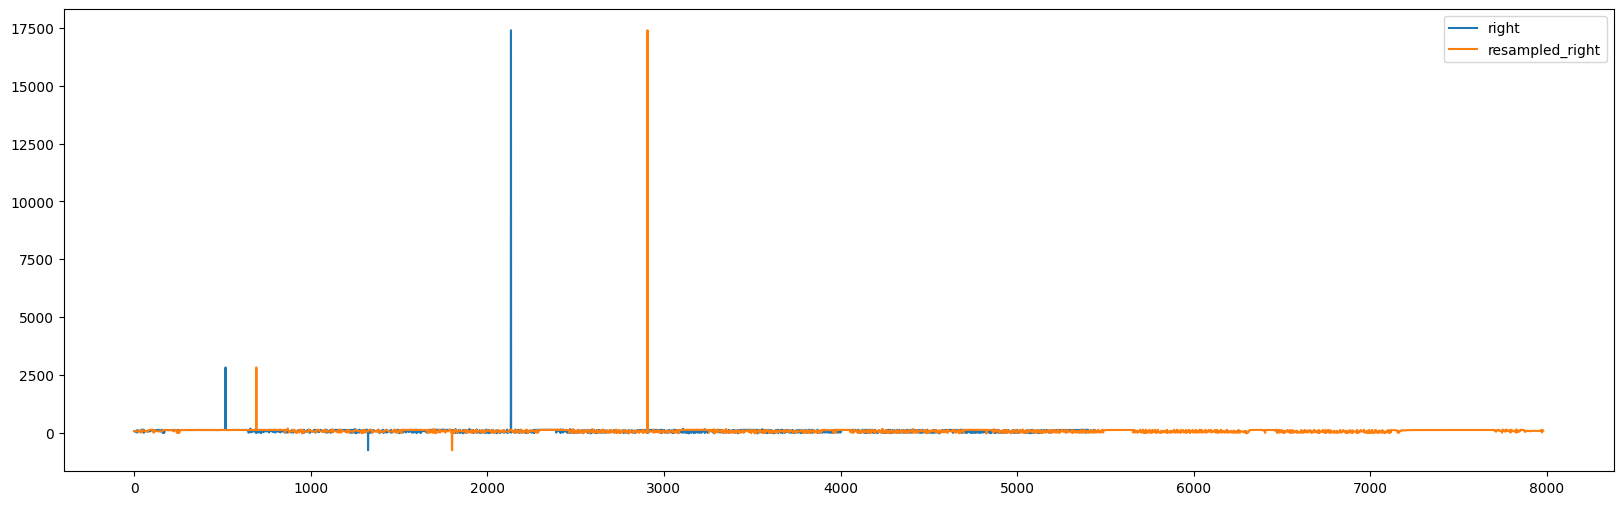

In [215]:
figure = plt.figure(figsize=(20, 6))

start = 0
end = 100

right['raw_14'].plot(label='right')
reright['raw_14'].plot(label='resampled_right')



plt.legend()
plt.show()

In [216]:
def zones(data):
    data['back'] = data[['raw_1', 'raw_2', 'raw_3']].mean(axis=1)
    data['middle'] = data[['raw_4', 'raw_12', 'raw_13', 'raw_14']].mean(axis=1)
    data['front'] = data[['raw_5', 'raw_6', 'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11']].mean(axis=1)

    return data

left = zones(left)
right = zones(right)

In [217]:
df = pd.merge(releft.drop('Timestamp', axis=1), reright.drop('Timestamp', axis=1), on='ms', how='inner', suffixes=('_left', '_right'))

print(len(releft), len(reright), len(df))
df

7439 7979 7439


,ms,raw_1_left,raw_2_left,raw_3_left,raw_4_left,raw_5_left,raw_6_left,raw_7_left,raw_8_left,raw_9_left,...,raw_11_right,raw_12_right,raw_13_right,raw_14_right,acc_x_right,acc_y_right,acc_z_right,gyro_x_right,gyro_y_right,gyro_z_right
0,1900-01-01 22:26:43.000,129,124,131,123,111,119,129,55,20,...,7,92,67,59,333,1255,-3229,-1482,433,-7
1,1900-01-01 22:26:43.050,129,124,131,123,111,119,129,55,20,...,7,92,67,59,333,1255,-3229,-1482,433,-7
2,1900-01-01 22:26:43.100,128,124,130,122,111,120,129,54,21,...,7,92,67,59,333,1255,-3229,-1482,433,-7
3,1900-01-01 22:26:43.150,130,125,129,124,111,125,129,54,22,...,7,92,67,59,333,1255,-3229,-1482,433,-7
4,1900-01-01 22:26:43.200,130,125,129,124,111,125,129,54,22,...,7,92,67,59,333,1255,-3229,-1482,433,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,1900-01-01 22:32:54.700,148,127,117,120,66,87,116,41,7,...,23,111,119,109,169,-207,-4054,10,4,-9
7435,1900-01-01 22:32:54.750,149,128,116,121,64,88,117,41,7,...,24,110,117,110,167,-209,-4050,7,3,-10
7436,1900-01-01 22:32:54.800,148,129,118,121,65,85,117,41,9,...,17,108,117,110,177,-198,-4057,0,7,-14
7437,1900-01-01 22:32:54.850,148,129,118,121,65,85,117,41,9,...,17,108,117,110,177,-198,-4057,0,7,-14


In [218]:
# print(len(left['Timestamp'].unique()), len(right['Timestamp'].unique()))
# ts_info = pd.merge(left.groupby('Timestamp').size().reset_index(name='count'), 
#                    right.groupby('Timestamp').size().reset_index(name='count'), 
#                    on='Timestamp', how='inner', suffixes=('_left', '_right'))
# ts_info

In [219]:
# ts_info.mean()

In [220]:
# accelerometer total from left and right
# acc_left = np.sqrt((left['acc_x']*9.81/4096)**2 + (left['acc_y']*9.81/4096)**2 + (left['acc_z']*9.81/4096)**2) - 9.81
# acc_right = np.sqrt((right['acc_x']*9.81/4096)**2 + (right['acc_y']*9.81/4096)**2 + (right['acc_z']*9.81/4096)**2) - 9.81

# accelerometer total from matched df
acc_left = np.sqrt((df['acc_x_left']*9.81/4096)**2 + (df['acc_y_left']*9.81/4096)**2 + (df['acc_z_left']*9.81/4096)**2) - 9.81
acc_right = np.sqrt((df['acc_x_right']*9.81/4096)**2 + (df['acc_y_right']*9.81/4096)**2 + (df['acc_z_right']*9.81/4096)**2) - 9.81

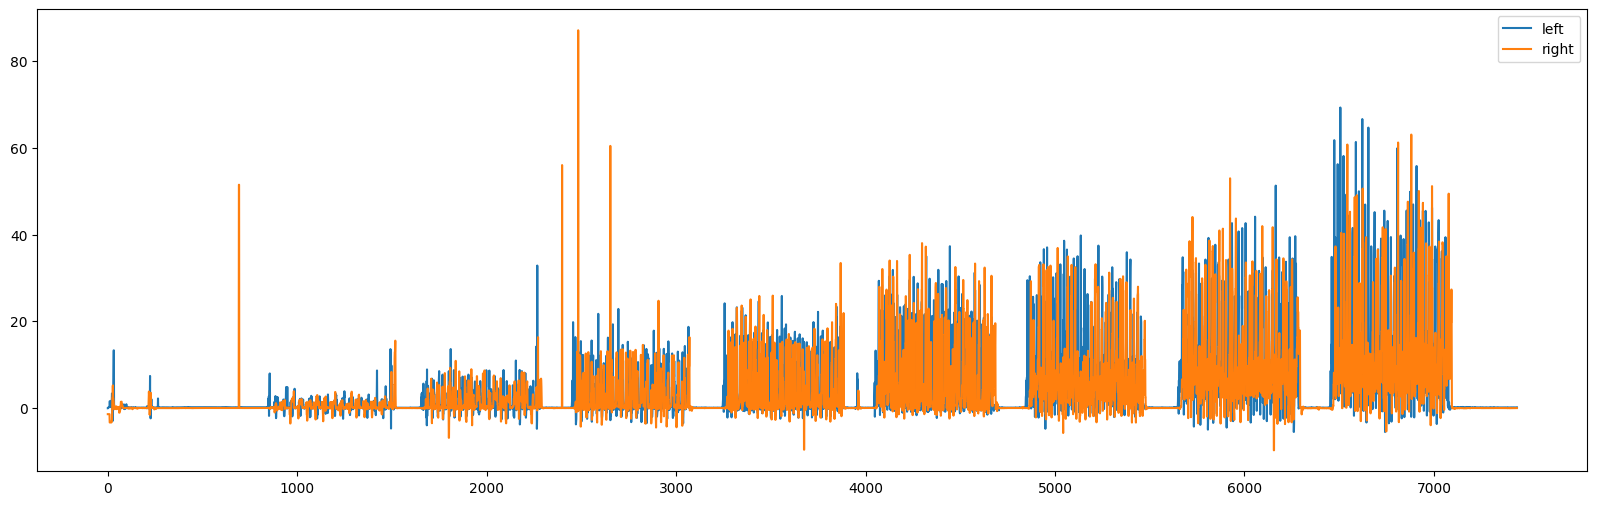

In [221]:
plt.figure(figsize=(20, 6))

acc_left.plot(label='left')
acc_right.plot(label='right')

plt.legend()
plt.show()

In [222]:
def activity_mask(data, threshold=7, window=60):
    diff = data.diff()
    count = []
    activity = False
    c = 0

    for x in diff:
        if x > threshold and activity == False:
            activity = True
            c = 0
        if x > threshold and activity == True:
            c = 0
            pass
        if x <= threshold and activity == True:
            if c <= window:
                pass
            else:
                activity = False
        else:
            pass

        c += 1
        count.append(activity)
    return np.array(count)

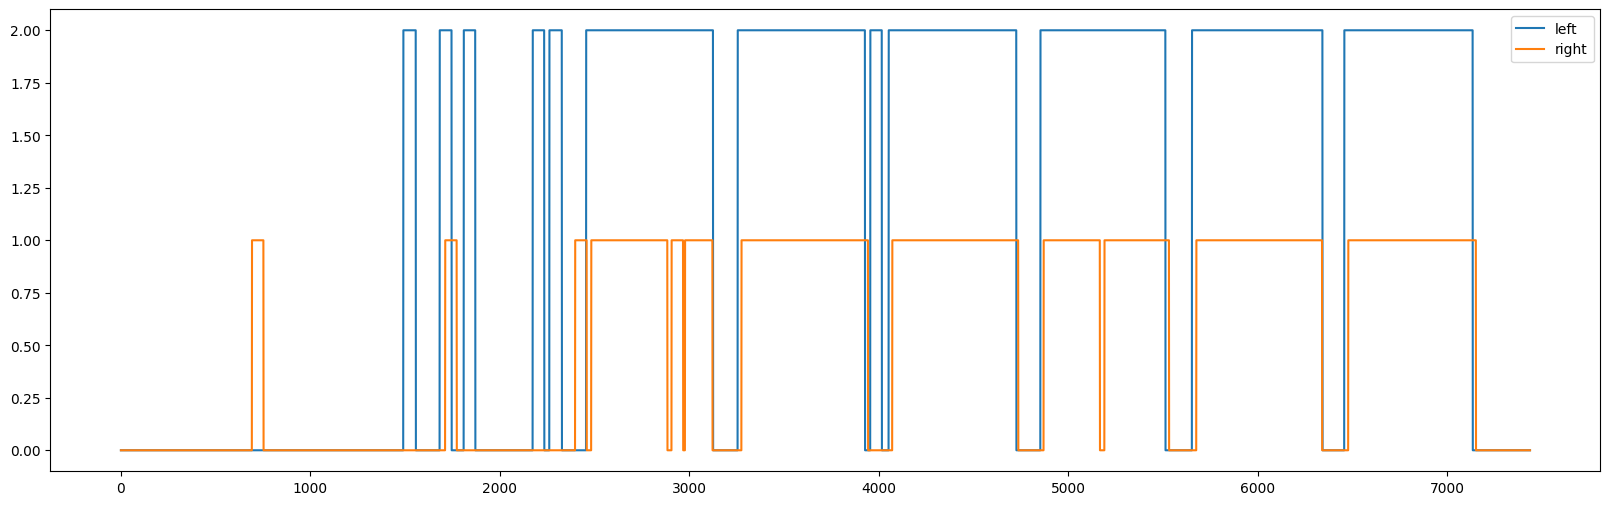

In [223]:
plt.figure(figsize=(20, 6))

(pd.DataFrame(activity_mask(acc_left)) * 2)[0].plot(label='left')
(pd.DataFrame(activity_mask(acc_right)) * 1)[0].plot(label='right')

plt.legend()
plt.show()

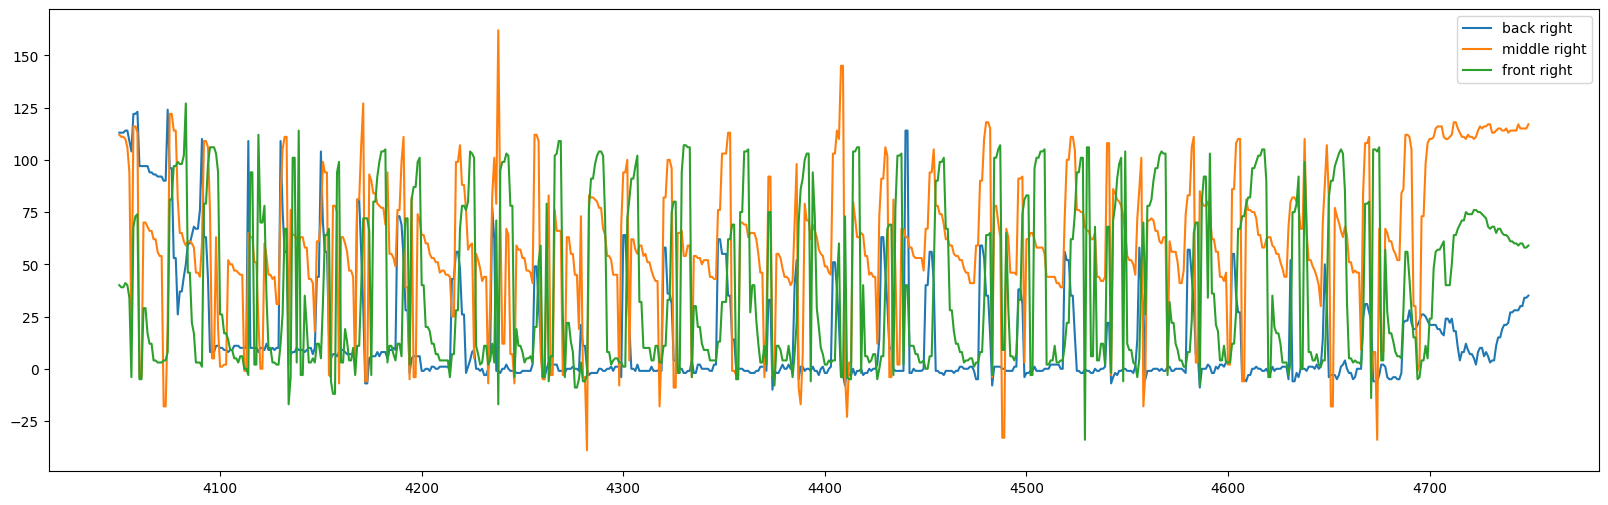

In [224]:
plt.figure(figsize=(20, 6))

start = 4050
end = 4750

# df['raw_2_left'][start:end].plot(label='back left')
# df['raw_14_left'][start:end].plot(label='middle left')
# df['raw_8_left'][start:end].plot(label='front left')
df['raw_2_right'][start:end].plot(label='back right')
df['raw_14_right'][start:end].plot(label='middle right')
df['raw_8_right'][start:end].plot(label='front right')

plt.legend()
plt.show()

In [225]:
def butter_filter(data):
    x = data[['raw_1_left', 'raw_2_left', 'raw_3_left', 'raw_4_left', 'raw_5_left', 'raw_6_left', 'raw_7_left',
              'raw_8_left', 'raw_9_left', 'raw_10_left', 'raw_11_left', 'raw_12_left', 'raw_13_left','raw_14_left',
              'raw_1_right', 'raw_2_right', 'raw_3_right', 'raw_4_right', 'raw_5_right', 'raw_6_right', 'raw_7_right',
              'raw_8_right', 'raw_9_right', 'raw_10_right', 'raw_11_right', 'raw_12_right', 'raw_13_right','raw_14_right']]

    nyq = 0.5 * 20                  # Nyquist frequency
    normal_cutoff = 1.8 / nyq    # Normalize the cutoff

    b, a = signal.butter(4, 0.2, btype='lowpass', analog=False)

    for col in x.columns:
        data[col] = signal.filtfilt(b, a, x[col])
    return data

df = butter_filter(df)
df

,ms,raw_1_left,raw_2_left,raw_3_left,raw_4_left,raw_5_left,raw_6_left,raw_7_left,raw_8_left,raw_9_left,...,raw_11_right,raw_12_right,raw_13_right,raw_14_right,acc_x_right,acc_y_right,acc_z_right,gyro_x_right,gyro_y_right,gyro_z_right
0,1900-01-01 22:26:43.000,128.908710,123.949448,130.771628,122.337284,110.175909,117.956538,128.887398,54.577834,20.077504,...,7.000789,91.991521,66.988718,58.992697,333,1255,-3229,-1482,433,-7
1,1900-01-01 22:26:43.050,129.829109,124.371634,132.200718,123.531282,109.634426,118.571405,128.667137,51.957738,17.183639,...,7.029100,91.984796,67.030870,59.037004,333,1255,-3229,-1482,433,-7
2,1900-01-01 22:26:43.100,130.635231,124.661700,132.825656,124.785646,109.621191,119.692923,128.597906,49.697189,14.898257,...,7.065478,91.978674,67.088252,59.097756,333,1255,-3229,-1482,433,-7
3,1900-01-01 22:26:43.150,131.096225,124.663594,131.721140,125.714571,110.266170,121.396138,128.759062,48.246302,14.103786,...,7.107460,91.971135,67.152215,59.170728,333,1255,-3229,-1482,433,-7
4,1900-01-01 22:26:43.200,130.925013,124.252545,128.101899,125.810659,111.622268,123.747801,129.216279,48.325020,15.954876,...,7.137713,91.965028,67.195185,59.227216,333,1255,-3229,-1482,433,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,1900-01-01 22:32:54.700,148.295106,127.745532,117.130910,119.941708,65.120279,86.602951,116.845582,41.225307,-797.397219,...,22.082919,109.552834,118.197923,109.466005,169,-207,-4054,10,4,-9
7435,1900-01-01 22:32:54.750,148.145679,127.972482,117.129954,120.115142,64.983804,86.750679,116.799346,41.275721,-625.060793,...,21.023515,109.158471,117.915099,109.411067,167,-209,-4050,7,3,-10
7436,1900-01-01 22:32:54.800,147.870735,128.268893,117.106715,120.174268,64.733909,87.227244,116.810552,41.436600,-414.580603,...,19.774528,108.568431,117.607069,109.323016,177,-198,-4057,0,7,-14
7437,1900-01-01 22:32:54.850,147.476015,128.617161,117.060922,120.115460,64.390837,88.017797,116.875712,41.700129,-199.062453,...,18.403546,107.821669,117.300173,109.181786,177,-198,-4057,0,7,-14


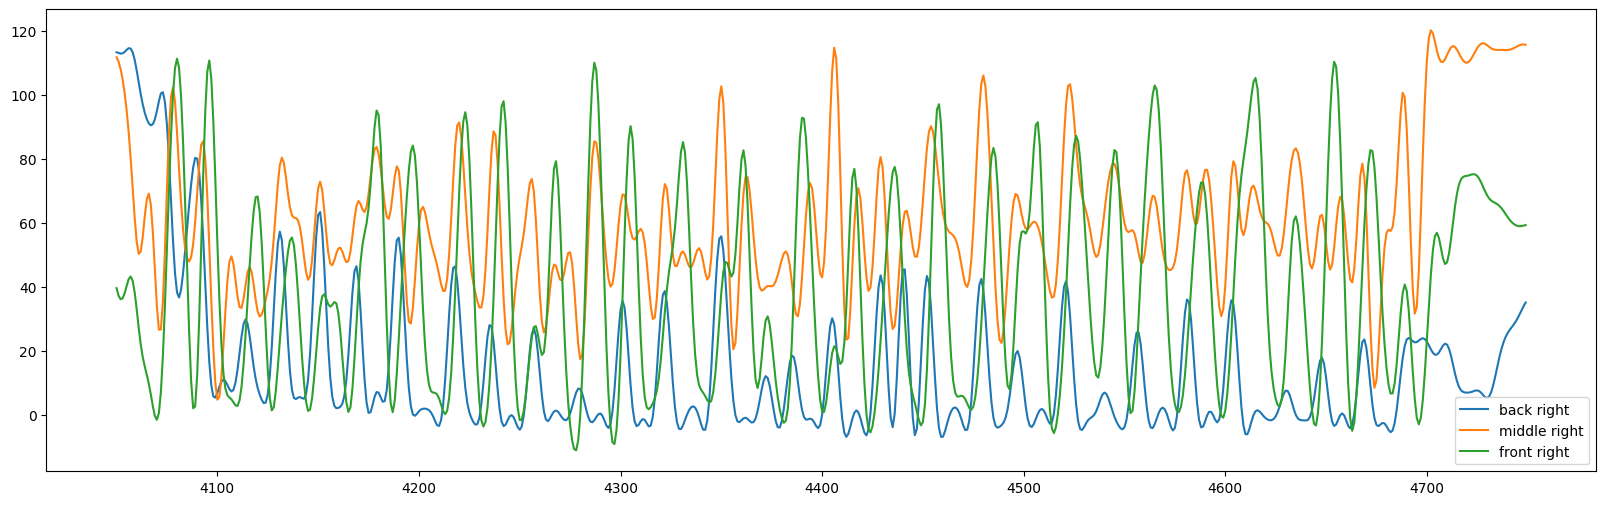

In [226]:
plt.figure(figsize=(20, 6))

# df['raw_2_left'][start:end].plot(label='back left')
# df['raw_14_left'][start:end].plot(label='middle left')
# df['raw_8_left'][start:end].plot(label='front left')
df['raw_2_right'][start:end].plot(label='back right')
df['raw_14_right'][start:end].plot(label='middle right')
df['raw_8_right'][start:end].plot(label='front right')

plt.legend()
plt.show()

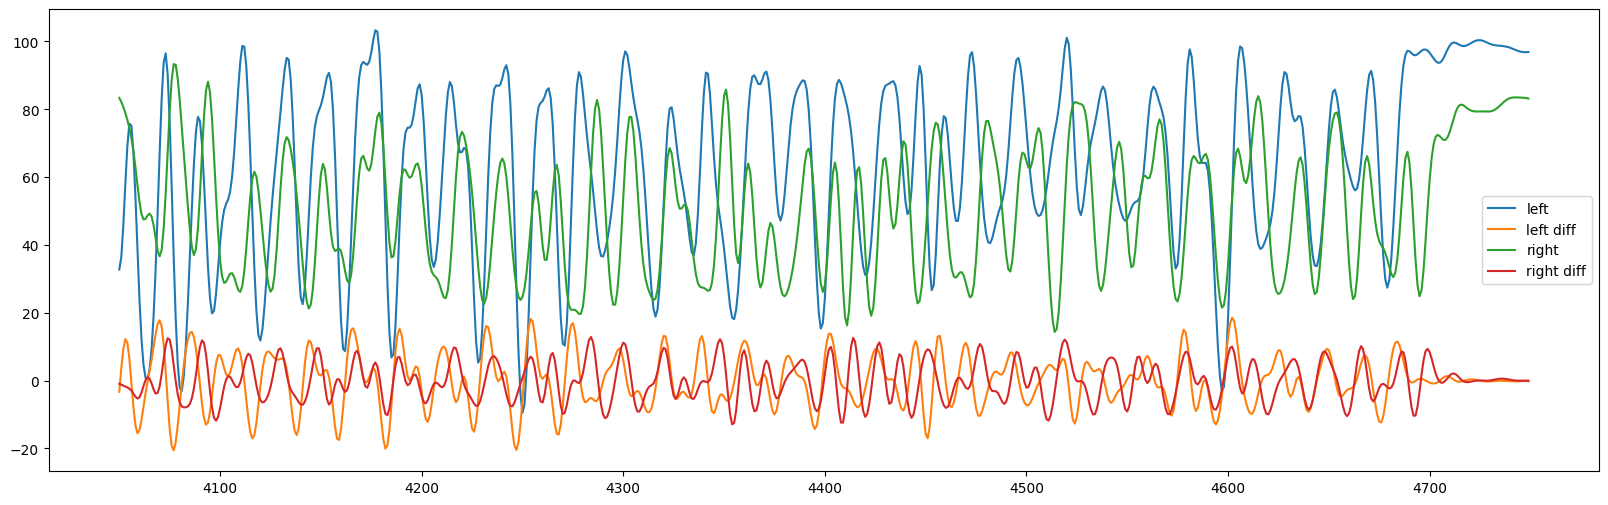

In [227]:
plt.figure(figsize=(20, 6))

l_pre = df[['raw_1_left', 'raw_2_left', 'raw_3_left', 'raw_4_left', 'raw_5_left', 'raw_6_left', 'raw_7_left',
             'raw_8_left', 'raw_9_left', 'raw_10_left', 'raw_11_left', 'raw_12_left', 'raw_13_left','raw_14_left']]
r_pre = df[['raw_1_right', 'raw_2_right', 'raw_3_right', 'raw_4_right', 'raw_5_right', 'raw_6_right', 'raw_7_right',
             'raw_8_right', 'raw_9_right', 'raw_10_right', 'raw_11_right', 'raw_12_right', 'raw_13_right','raw_14_right']]

l_pre.mean(axis=1)[start:end].plot(label='left')
l_pre.mean(axis=1).diff()[start:end].plot(label='left diff')
r_pre.mean(axis=1)[start:end].plot(label='right')
r_pre.mean(axis=1).diff()[start:end].plot(label='right diff')

plt.legend()
plt.show()	

In [116]:
def default_positions():
    return {
        "left": {
            "x": np.asarray(
                [
                    -149,
                    -133,
                    -115,
                    -112,
                    -96,
                    -117,
                    -101,
                    -126,
                    -146,
                    -161,
                    -140,
                    -159,
                    -158,
                    -156,
                ]
            ),
            "y": np.asarray([-95, -114, -92, -16, 50, 56, 97, 101, 87, 62, 55, 25, -10, -41]),
        },
        "right": {
            "x": np.asarray(
                [
                    149,
                    133,
                    115,
                    112,
                    96,
                    117,
                    101,
                    126,
                    146,
                    161,
                    140,
                    159,
                    158,
                    156,
                ]
            ),
            "y": np.asarray([-95, -114, -92, -16, 50, 56, 97, 101, 87, 62, 55, 25, -10, -41]),
        },
    }

def_pos = default_positions()
def_pos

{'left': {'x': array([-149, -133, -115, -112,  -96, -117, -101, -126, -146, -161, -140,
         -159, -158, -156]),
  'y': array([ -95, -114,  -92,  -16,   50,   56,   97,  101,   87,   62,   55,
           25,  -10,  -41])},
 'right': {'x': array([149, 133, 115, 112,  96, 117, 101, 126, 146, 161, 140, 159, 158,
         156]),
  'y': array([ -95, -114,  -92,  -16,   50,   56,   97,  101,   87,   62,   55,
           25,  -10,  -41])}}

In [117]:
right_cop_x = (r_pre * def_pos['right']['x']).sum(axis=1) / r_pre.sum(axis=1)
right_cop_y = (r_pre * def_pos['right']['y']).sum(axis=1) / r_pre.sum(axis=1)
left_cop_x = (l_pre * def_pos['left']['x']).sum(axis=1) / l_pre.sum(axis=1)
left_cop_y = (l_pre * def_pos['left']['y']).sum(axis=1) / l_pre.sum(axis=1)

7439 7439 7439 7439


In [206]:
start, end = 750, 1550

right_peaks_pos, _ = signal.find_peaks(right_cop_y[start:end], prominence=8, distance=8)
right_peaks_neg, _ = signal.find_peaks(-right_cop_y[start:end], prominence=8, distance=8)
left_peaks_pos, _ = signal.find_peaks(left_cop_y[start:end], prominence=8, distance=8)
left_peaks_neg, _ = signal.find_peaks(-left_cop_y[start:end], prominence=8, distance=8)

In [193]:
def gait_timings(positive, negative):
    pairs = {"step": [], "swing": [], "stride": []}
    timings = {"step": [], "swing": [], "stride": []}

    for n in negative:
        for p in positive:
            if n < p:
                time = abs(p - n)
                pairs["step"].append((n, p))
                timings["step"].append(time * 0.05)
                break

    for p in positive:
        for n in negative:
            if n > p:
                time = abs(n - p)
                pairs["swing"].append((p, n))
                timings["swing"].append(time * 0.05)
                break

    for i in range(len(negative) - 1):
        time = abs(negative[i] - negative[i + 1])
        pairs["stride"].append((negative[i], negative[i + 1]))
        timings["stride"].append(time * 0.05)

    return timings, pairs


def find_cop_velocity(data, time, peaks):
    velocity_array = []

    for i in range(len(time)):
        n, p = peaks[i]
        velocity_array.append((data[p] - data[n]) / time[i])

    return velocity_array


def calculate_gait_speed(timings, pairs, acc_data=[]):
    gait_velocities = []
    print("gait Speed Data Input", len(timings), len(pairs))
    for i in range(len(pairs["stride"])):
        start_idx, end_idx = pairs["stride"][i]
        acc_window = acc_data[start_idx:end_idx]  # Extract acceleration data within the window

        time_steps = timings["stride"][i] / len(acc_window)  # Calculate time step

        # Numerical integration using trapezoidal rule
        velocity = abs(np.diff(acc_window))
        sum_velocity = np.cumsum(velocity)
        mean_velocity = np.mean(velocity)
        # integrated_velocity = np.trapz(acc_window, dx=0.05)
        integrated_velocity = np.trapz(acc_window, dx=0.05)
        gait_velocities.append(integrated_velocity)

    print(len(gait_velocities))
    return gait_velocities


def get_cov(array):
    # cv =  lambda x: np.std(x) / np.mean(x)
    # var = np.apply_along_axis(cv, axis=0, arr=array)
    # idmax = np.argmax(var)
    return np.std(array) / np.mean(array)


def find_rhythm(l_timings, r_timings):
    step_time_acf = np.correlate(l_timings["step"], r_timings["step"], mode="full")  # acf - Auto Correlation Function
    stride_time_acf = np.correlate(l_timings["stride"], r_timings["stride"], mode="full")  # acf - Auto Correlation Function
    step_time_acf = step_time_acf / np.max(step_time_acf)
    stride_time_acf = stride_time_acf / np.max(stride_time_acf)
    step_time_rhythm = step_time_acf[len(step_time_acf) // 2]
    stride_time_rhythm = step_time_acf[len(step_time_acf) // 2]
    return step_time_rhythm, stride_time_rhythm


def generate_dummy(file, date, session):
    return {
        # 'File': file,
        "Date": date,
        "Session": session,
    }

In [207]:
r_timings, r_pairs = gait_timings(right_peaks_pos, right_peaks_neg)
r_velocity = find_cop_velocity(right_cop_y, r_timings['step'], r_pairs['step'])
r_gaitspeed = calculate_gait_speed(r_timings, r_pairs, acc_right[start:end])
r_cadence = len(right_peaks_pos) / 0.5 * 2      # 30s intervals
r_data ={
    'Session': 358,     # update if necessary
    # 'Total_Act_Time': len(right_log['masked']) * 0.05 / 60,
    'Avg_Step_Time': round(np.mean(r_timings['step']), 3),
    'Avg_Swing_Time': round(np.mean(r_timings['swing']), 3),
    'Avg_Stride_Time': round(np.mean(r_timings['stride']), 3),
    'Total_Steps': len(right_peaks_pos) * 2,
    'Avg_Cadence': r_cadence,
    'Step_Time_Var': round(np.std(r_timings['step']), 3),
    'Swing_Time_Var': round(np.std(r_timings['swing']), 3),
    'Stride_Time_Var': round(np.std(r_timings['stride']), 3),
    'Avg_COP': round(np.median(r_velocity) * 2.5 / 100, 3),

}

l_timings, l_pairs = gait_timings(left_peaks_pos, left_peaks_neg)
l_velocity = find_cop_velocity(left_cop_y, l_timings['step'], l_pairs['step'])
l_gaitspeed = calculate_gait_speed(l_timings, l_pairs, acc_left[start:end])
l_cadence = len(left_peaks_pos) / 0.5 * 2       # 30s intervals
l_data = {
    'Session': 358,     # update if necessary
    # 'Total_Act_Time': len(left_log['masked']) * 0.05 / 60,
    'Avg_Step_Time': round(np.mean(l_timings['step']), 3),
    'Avg_Swing_Time': round(np.mean(l_timings['swing']), 3),
    'Avg_Stride_Time': round(np.mean(l_timings['stride']), 3),
    'Total_Steps': len(left_peaks_pos) * 2,
    'Avg_Cadence': l_cadence,
    'Step_Time_Var': round(np.std(l_timings['step']), 3),
    'Swing_Time_Var': round(np.std(l_timings['swing']), 3), 
    'Stride_Time_Var': round(np.std(l_timings['stride']), 3),
    'Avg_COP': round(np.median(l_velocity) * 2.5 / 100, 3),

}
print(r_data)
print(l_data)

gait Speed Data Input 3 3
20
gait Speed Data Input 3 3
17
{'Session': 358, 'Avg_Step_Time': 1.057, 'Avg_Swing_Time': 0.805, 'Avg_Stride_Time': 1.85, 'Total_Steps': 42, 'Avg_Cadence': 84.0, 'Step_Time_Var': 0.678, 'Swing_Time_Var': 0.44, 'Stride_Time_Var': 0.902, 'Avg_COP': -0.007}
{'Session': 358, 'Avg_Step_Time': 1.062, 'Avg_Swing_Time': 0.817, 'Avg_Stride_Time': 1.894, 'Total_Steps': 36, 'Avg_Cadence': 72.0, 'Step_Time_Var': 0.378, 'Swing_Time_Var': 0.305, 'Stride_Time_Var': 0.559, 'Avg_COP': -0.002}


In [208]:
print(np.mean(r_gaitspeed), np.mean(l_gaitspeed))

0.5754327765244748 1.0279293894008346


In [209]:
print(np.mean(r_velocity), np.mean(l_velocity))

-0.41474437793376706 0.18038852479660292
